In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816],
                     [8.9], [5.2], [8.59], [2.1], [8],
                     [10], [4.5], [6], [4]], dtype = np.float32)
y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357],
                     [2.6], [1.96], [3.53], [1.76], [3.2],
                     [3.5], [1.6], [2.5], [2.2]], dtype = np.float32)

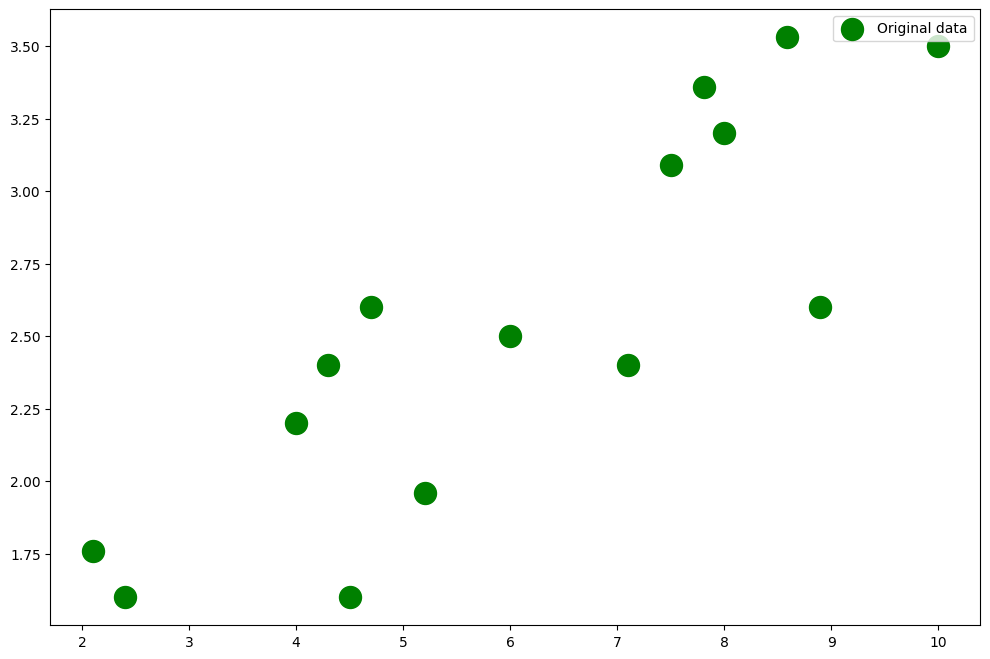

In [3]:
plt.figure(figsize=(12,8))

plt.scatter(x_train, y_train, label='Original data', s=250, c='g')

plt.legend()
plt.show()

In [4]:
import torch

In [5]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)
print('requires_grad  for X_train: ', X_train.requires_grad)
print('requires_grad  for Y_train: ', Y_train.requires_grad)

requires_grad  for X_train:  False
requires_grad  for Y_train:  False


In [6]:
input_size = 1
hidden_size = 1
output_size = 1

In [7]:
w1 = torch.rand(input_size, hidden_size, requires_grad = True)
w1.shape

torch.Size([1, 1])

In [8]:
w2 = torch.rand(input_size, hidden_size, requires_grad = True)
w2.shape

torch.Size([1, 1])

In [9]:
learning_rate = 1e-6

In [10]:
for iter in range(1,3000):
    y_pred = X_train.mm(w1).mm(w2)
    loss = (y_pred - Y_train).pow(2).sum()
    if iter % 50 == 0:
        print(iter, loss.item())
    loss.backward()
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

50 17.481735229492188
100 16.644384384155273
150 15.845707893371582
200 15.085247993469238
250 14.362412452697754
300 13.676490783691406
350 13.026652336120605
400 12.411998748779297
450 11.83154296875
500 11.284226417541504
550 10.768943786621094
600 10.28452205657959
650 9.829792022705078
700 9.403505325317383
750 9.004449844360352
800 8.63138198852539
850 8.283056259155273
900 7.958240032196045
950 7.6557111740112305
1000 7.374292850494385
1050 7.112793445587158
1100 6.870078086853027
1150 6.64504337310791
1200 6.436617374420166
1250 6.243764877319336
1300 6.06550407409668
1350 5.900881767272949
1400 5.7489914894104
1450 5.608970642089844
1500 5.479996204376221
1550 5.361299991607666
1600 5.252140998840332
1650 5.151827812194824
1700 5.059712886810303
1750 4.975186347961426
1800 4.89766788482666
1850 4.8266282081604
1900 4.761565685272217
1950 4.702007293701172
2000 4.64752197265625
2050 4.597707271575928
2100 4.552175521850586
2150 4.510591506958008
2200 4.472622394561768
2250 4.43

In [11]:
print('w1: ', w1)
print('w2: ', w2)

w1:  tensor([[0.6339]], requires_grad=True)
w2:  tensor([[0.6078]], requires_grad=True)


In [12]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [13]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.8109],
        [0.9247],
        [2.8897],
        [2.7355],
        [1.6567],
        [3.0114],
        [3.4291],
        [2.0035],
        [3.3096],
        [0.8091],
        [3.0823],
        [3.8529],
        [1.7338],
        [2.3117],
        [1.5411]], grad_fn=<MmBackward0>)

In [14]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.810851  ],
       [0.92468995],
       [2.8896558 ],
       [2.7355409 ],
       [1.6567361 ],
       [3.0114067 ],
       [3.4290583 ],
       [2.0034947 ],
       [3.3096192 ],
       [0.8091036 ],
       [3.0822997 ],
       [3.8528745 ],
       [1.7337935 ],
       [2.3117247 ],
       [1.5411499 ]], dtype=float32)

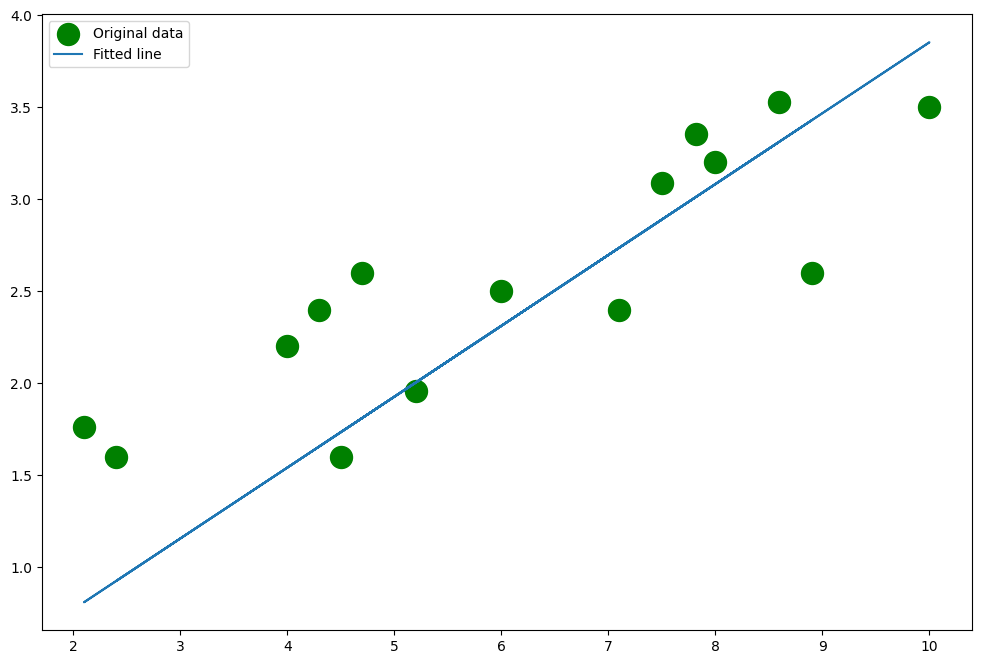

In [15]:
plt.figure(figsize=(12,8))

plt.scatter(x_train, y_train, label='Original data', s=250, c='g')

plt.plot(x_train, predicted, label='Fitted line')

plt.legend()
plt.show()